In [1]:
# Thomas Carlberg 
# NHL Web Scraping and Data Predicting
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# url for hockey-reference.com player stats table 2019-2020
html = requests.get('https://www.hockey-reference.com/leagues/NHL_2020_skaters.html')

In [3]:
content = BeautifulSoup(html.content, 'html.parser')

In [4]:
stats = [] # aim to have one list of player stats per element, then turn this into DataFrame
table_body = content.find(id='stats').find('tbody') 

In [5]:
table_body # every 20 rows there is another header row MUST REMOVE

<tbody>
<tr><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Abdelkader,Justin" data-append-csv="abdelju01" data-stat="player"><a href="/players/a/abdelju01.html">Justin Abdelkader</a></td><td class="center" data-stat="age">32</td><td class="left" data-stat="team_id"><a href="/teams/DET/2020.html">DET</a></td><td class="center" csk="1:Abdelkader:Justin" data-stat="pos">LW</td><td class="right" data-stat="games_played">16</td><td class="right iz" data-stat="goals">0</td><td class="right" data-stat="assists">3</td><td class="right" data-stat="points">3</td><td class="right" data-stat="plus_minus">1</td><td class="right" data-stat="pen_min">4</td><td class="right" data-stat="ps">0.0</td><td class="right iz" data-stat="goals_ev">0</td><td class="right iz" data-stat="goals_pp">0</td><td class="right iz" data-stat="goals_sh">0</td><td class="right iz" data-stat="goals_gw">0</td><td class="right" data-stat="assists_ev">3</td><td class="right iz" data-stat="

In [6]:
for rows in table_body.find_all('tr'):
    row_data = []
    if (rows.text[:3].strip() == 'Rk'): # skip header row that appears every 20 rows
        continue
    # add each td in the table to row_data then add one list per player to stats array
    for td in rows.find_all():
        row_data.append(td.text)
    stats.append(row_data)

In [7]:
len(stats) # 768 rows

768

In [8]:
len(stats[0]) # 30 columns per row

30

In [9]:
# player and team names appear twice for some reason, because of <a> tag maybe? REMOVE THEM
column_names = ['Rank', 'Player', 'Player_Name', 'Age', 'Team', 'Team_Name', 'Position', 'GP', 'G', 'A', 'Points', '+/-', 'PIM', 'PS', 'EV', 'PPG', 
        'SHG', 'GWG', 'EVA', 'PPA', 'SHA', 'SOG', 'Shooting%', 'TOI', 'ATOI', 'BLK', 'HIT', 'FOW', 'FOL', 'FO%']

In [10]:
# create DataFrame
data = pd.DataFrame(stats, columns=column_names, dtype=float)

In [11]:
data # stats accurate as of 26/11/2019

,Rank,Player,Player_Name,Age,Team,Team_Name,Position,GP,G,A,...,SHA,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
0,1.0,Justin Abdelkader,Justin Abdelkader,32.0,DET,DET,LW,16.0,0.0,3.0,...,0.0,15.0,0.0,208,13:01,8.0,26.0,14.0,19,42.4
1,2.0,Vitaly Abramov,Vitaly Abramov,21.0,OTT,OTT,RW,2.0,1.0,0.0,...,0.0,3.0,33.3,12,5:47,0.0,0.0,0.0,0,
2,3.0,Noel Acciari,Noel Acciari,28.0,FLA,FLA,C,21.0,5.0,1.0,...,0.0,34.0,14.7,313,14:54,29.0,27.0,134.0,137,49.4
3,4.0,Andrew Agozzino,Andrew Agozzino,29.0,PIT,PIT,LW,1.0,0.0,0.0,...,0.0,0.0,,2,1:44,0.0,1.0,0.0,1,0.0
4,5.0,Sebastian Aho,Sebastian Aho,22.0,CAR,CAR,F,24.0,12.0,8.0,...,1.0,76.0,15.8,465,19:24,8.0,12.0,139.0,146,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,754.0,Travis Zajac,Travis Zajac,34.0,NJD,NJD,C,22.0,2.0,4.0,...,0.0,16.0,12.5,366,16:39,9.0,22.0,162.0,139,53.8
764,755.0,Mika Zibanejad,Mika Zibanejad,26.0,NYR,NYR,C,9.0,4.0,7.0,...,1.0,27.0,14.8,188,20:52,6.0,10.0,92.0,86,51.7
765,756.0,Mats Zuccarello,Mats Zuccarello,32.0,MIN,MIN,LW,20.0,4.0,7.0,...,0.0,27.0,14.8,315,15:46,11.0,3.0,5.0,2,71.4
766,757.0,Jason Zucker,Jason Zucker,28.0,MIN,MIN,LW,24.0,8.0,8.0,...,0.0,46.0,17.4,386,16:06,14.0,15.0,10.0,14,41.7


In [12]:
data.drop(['Player_Name', 'Team_Name'], axis=1, inplace=True) # Remove duplicate columns

In [13]:
data.dtypes

Rank         float64
Player        object
Age          float64
Team          object
Position      object
GP           float64
G            float64
A            float64
Points       float64
+/-          float64
PIM          float64
PS           float64
EV           float64
PPG          float64
SHG          float64
GWG          float64
EVA          float64
PPA          float64
SHA          float64
SOG          float64
Shooting%     object
TOI           object
ATOI          object
BLK          float64
HIT          float64
FOW          float64
FOL           object
FO%           object
dtype: object

In [14]:
data.sort_values('Points', ascending=False) 

,Rank,Player,Age,Team,Position,GP,G,A,Points,+/-,...,SHA,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%
169,168.0,Leon Draisaitl,24.0,EDM,C,26.0,16.0,32.0,48.0,6.0,...,0.0,83.0,19.3,595,22:53,6.0,5.0,167.0,174,49.0
472,467.0,Connor McDavid,23.0,EDM,C,26.0,18.0,29.0,47.0,5.0,...,0.0,90.0,20.0,580,22:18,9.0,13.0,96.0,111,46.4
455,450.0,Brad Marchand,31.0,BOS,LW,23.0,16.0,23.0,39.0,17.0,...,0.0,59.0,27.1,453,19:42,2.0,14.0,11.0,16,40.7
544,537.0,David Pastrnak,23.0,BOS,RW,23.0,20.0,16.0,36.0,9.0,...,0.0,94.0,21.3,441,19:10,7.0,13.0,1.0,4,20.0
95,96.0,John Carlson,30.0,WSH,D,25.0,8.0,28.0,36.0,15.0,...,0.0,70.0,11.4,633,25:20,41.0,17.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,418.0,Tyler Lewington,25.0,WSH,D,6.0,0.0,0.0,0.0,-2.0,...,0.0,2.0,0.0,61,10:10,7.0,11.0,0.0,0,
448,443.0,Beck Malenstyn,21.0,WSH,LW,2.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,20,10:01,0.0,1.0,0.0,0,
500,495.0,Vladislav Namestnikov,27.0,TOT,22,6.0,6.0,12.0,-1.0,19.0,...,40.0,15.0,358,16:18,15,19.0,8.0,14.0,36.4,None
549,542.0,Brendan Perlini,23.0,TOT,14,0.0,1.0,1.0,-4.0,6.0,...,24.0,0.0,165,11:46,4,7.0,0.0,0.0,,None


In [15]:
# Points is cumulative but Points Per Game is a better measure of player skill
data['P/GP'] = data['Points'] / data['GP']

In [16]:
data['P/GP']

0      0.187500
1      0.500000
2      0.285714
3      0.000000
4      0.833333
         ...   
763    0.272727
764    1.222222
765    0.550000
766    0.666667
767    0.285714
Name: P/GP, Length: 768, dtype: float64

In [17]:
data.sort_values('P/GP', ascending=False)

,Rank,Player,Age,Team,Position,GP,G,A,Points,+/-,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
270,267.0,Erik Gudbranson,28.0,TOT,21,1.0,2.0,3.0,5.0,22.0,...,3.7,389,18:32,17,33.0,0.0,0.0,,None,5.000000
148,149.0,Jacob de La Rose,24.0,TOT,22,1.0,3.0,4.0,2.0,4.0,...,5.3,254,11:33,11,34.0,53.0,79.0,40.2,None,2.000000
169,168.0,Leon Draisaitl,24.0,EDM,C,26.0,16.0,32.0,48.0,6.0,...,83.0,19.3,595,22:53,6.0,5.0,167.0,174,49.0,1.846154
472,467.0,Connor McDavid,23.0,EDM,C,26.0,18.0,29.0,47.0,5.0,...,90.0,20.0,580,22:18,9.0,13.0,96.0,111,46.4,1.807692
455,450.0,Brad Marchand,31.0,BOS,LW,23.0,16.0,23.0,39.0,17.0,...,59.0,27.1,453,19:42,2.0,14.0,11.0,16,40.7,1.695652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,389.0,Karson Kuhlman,24.0,BOS,C,8.0,0.0,0.0,0.0,-2.0,...,13.0,0.0,103,12:53,2.0,6.0,0.0,1,0.0,0.000000
525,518.0,Logan O'Connor,23.0,COL,RW,3.0,0.0,0.0,0.0,1.0,...,2.0,0.0,25,8:28,0.0,1.0,0.0,0,,0.000000
500,495.0,Vladislav Namestnikov,27.0,TOT,22,6.0,6.0,12.0,-1.0,19.0,...,15.0,358,16:18,15,19.0,8.0,14.0,36.4,None,-0.166667
200,199.0,Robby Fabbri,24.0,TOT,18,4.0,5.0,9.0,-9.0,10.0,...,17.4,233,12:57,2,18.0,6.0,7.0,46.2,None,-2.250000


In [18]:
# TOT is not a team in the NHL (stands for Total maybe?), and players can't have negative points so these are messy rows, let's remove them
data.drop(data[data['Team'] == 'TOT'].index, inplace=True)

In [19]:
data.sort_values('P/GP', ascending=False)

,Rank,Player,Age,Team,Position,GP,G,A,Points,+/-,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
169,168.0,Leon Draisaitl,24.0,EDM,C,26.0,16.0,32.0,48.0,6.0,...,83.0,19.3,595,22:53,6.0,5.0,167.0,174,49.0,1.846154
472,467.0,Connor McDavid,23.0,EDM,C,26.0,18.0,29.0,47.0,5.0,...,90.0,20.0,580,22:18,9.0,13.0,96.0,111,46.4,1.807692
455,450.0,Brad Marchand,31.0,BOS,LW,23.0,16.0,23.0,39.0,17.0,...,59.0,27.1,453,19:42,2.0,14.0,11.0,16,40.7,1.695652
544,537.0,David Pastrnak,23.0,BOS,RW,23.0,20.0,16.0,36.0,9.0,...,94.0,21.3,441,19:10,7.0,13.0,1.0,4,20.0,1.565217
95,96.0,John Carlson,30.0,WSH,D,25.0,8.0,28.0,36.0,15.0,...,70.0,11.4,633,25:20,41.0,17.0,0.0,1,0.0,1.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,631.0,Logan Shaw,28.0,WPG,RW,10.0,0.0,0.0,0.0,-3.0,...,4.0,0.0,65,6:32,5.0,6.0,4.0,2,66.7,0.000000
337,332.0,Christian Jaros,23.0,OTT,D,1.0,0.0,0.0,0.0,-1.0,...,0.0,,10,10:21,0.0,2.0,0.0,0,,0.000000
637,628.0,Michael Sgarbossa,27.0,WSH,C,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,16,8:07,0.0,1.0,3.0,3,50.0,0.000000
633,624.0,Brett Seney,23.0,NJD,LW,1.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,9,8:45,0.0,1.0,0.0,0,,0.000000


In [20]:
data[data['Points'] < 0] # making sure there are no players left with negative points

,Rank,Player,Age,Team,Position,GP,G,A,Points,+/-,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP


In [21]:
data.dropna().shape == data.shape # checking that there are 0 rows with null data

True

In [22]:
# change data types that didn't auto change to float64
data['FOL'] = data['FOL'].astype('float64')

In [23]:
data.groupby('Team').Points.mean().sort_values(ascending=False)
# Edmonton and Boston have the 4 highest Points and Points/GP players but lower average points
# Carolina has the highest distribution of Points among its players

Team
CAR    10.181818
FLA    10.043478
WSH     9.541667
TBL     9.125000
EDM     9.120000
VAN     8.666667
MTL     8.652174
TOR     8.600000
STL     8.583333
COL     8.538462
NSH     8.520000
NYR     8.500000
VEG     8.173913
MIN     8.000000
ARI     7.909091
PIT     7.814815
CHI     7.782609
BOS     7.750000
DAL     7.583333
LAK     7.434783
SJS     7.407407
NYI     7.291667
ANA     7.291667
BUF     7.120000
CGY     7.041667
PHI     7.038462
CBJ     6.913043
WPG     6.629630
NJD     6.391304
OTT     5.600000
DET     5.586207
Name: Points, dtype: float64

In [24]:
data.head()
# This Rank column isn't helpful, it just ranks the players alphabetically so let's remove it and change the index to player name

,Rank,Player,Age,Team,Position,GP,G,A,Points,+/-,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
0,1.0,Justin Abdelkader,32.0,DET,LW,16.0,0.0,3.0,3.0,1.0,...,15.0,0.0,208,13:01,8.0,26.0,14.0,19.0,42.4,0.187500
1,2.0,Vitaly Abramov,21.0,OTT,RW,2.0,1.0,0.0,1.0,0.0,...,3.0,33.3,12,5:47,0.0,0.0,0.0,0.0,,0.500000
2,3.0,Noel Acciari,28.0,FLA,C,21.0,5.0,1.0,6.0,-6.0,...,34.0,14.7,313,14:54,29.0,27.0,134.0,137.0,49.4,0.285714
3,4.0,Andrew Agozzino,29.0,PIT,LW,1.0,0.0,0.0,0.0,-1.0,...,0.0,,2,1:44,0.0,1.0,0.0,1.0,0.0,0.000000
4,5.0,Sebastian Aho,22.0,CAR,F,24.0,12.0,8.0,20.0,9.0,...,76.0,15.8,465,19:24,8.0,12.0,139.0,146.0,48.8,0.833333


In [25]:
data.drop('Rank', axis=1, inplace=True)

In [26]:
data.set_index('Player', inplace=True)

In [27]:
data.head()

,Age,Team,Position,GP,G,A,Points,+/-,PIM,PS,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
Player,,,,,,,,,,,,,,,,,,,,,
Justin Abdelkader,32.0,DET,LW,16.0,0.0,3.0,3.0,1.0,4.0,0.0,...,15.0,0.0,208,13:01,8.0,26.0,14.0,19.0,42.4,0.187500
Vitaly Abramov,21.0,OTT,RW,2.0,1.0,0.0,1.0,0.0,2.0,0.2,...,3.0,33.3,12,5:47,0.0,0.0,0.0,0.0,,0.500000
Noel Acciari,28.0,FLA,C,21.0,5.0,1.0,6.0,-6.0,2.0,0.3,...,34.0,14.7,313,14:54,29.0,27.0,134.0,137.0,49.4,0.285714
Andrew Agozzino,29.0,PIT,LW,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,,2,1:44,0.0,1.0,0.0,1.0,0.0,0.000000
Sebastian Aho,22.0,CAR,F,24.0,12.0,8.0,20.0,9.0,6.0,2.8,...,76.0,15.8,465,19:24,8.0,12.0,139.0,146.0,48.8,0.833333


In [28]:
# How many players in each position?
data.Position.value_counts()

C        262
D        261
LW       129
RW        93
F         16
W          1
C; LW      1
Name: Position, dtype: int64

In [29]:
team_ages = data.groupby('Team').Age.agg(['count', 'min', 'max', 'mean', 'std']).sort_values('mean') 

In [30]:
team_ages
# NYR is the youngest average team in the league, DAL is the oldest

,count,min,max,mean,std
Team,,,,,
NYR,24,18.0,33.0,24.875000,3.992520
CAR,22,19.0,31.0,25.227273,3.191235
CBJ,23,20.0,32.0,25.304348,3.225393
TOR,25,19.0,36.0,25.400000,3.354102
BUF,25,19.0,32.0,25.480000,3.229035
OTT,30,20.0,38.0,25.566667,4.256300
PHI,26,19.0,33.0,25.730769,4.210061
ANA,24,20.0,34.0,25.750000,3.892579
WPG,27,18.0,34.0,25.925926,4.103712


Text(0, 0.5, 'Number of Players')

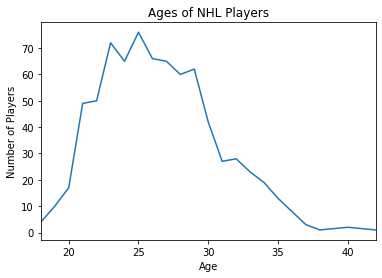

In [31]:
%matplotlib inline
#ages_plot = team_ages['mean'].plot(kind='density', title='Average Age among NHL Teams')
ages_plot = data.Age.value_counts().sort_index().plot(title='Ages of NHL Players')
ages_plot.set_xlabel('Age')
ages_plot.set_ylabel('Number of Players')

Text(15, 5, 'David Pastrnak')

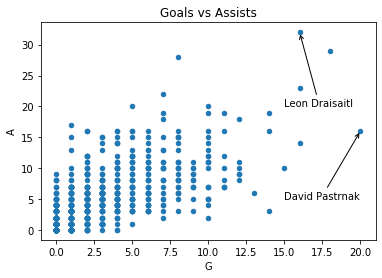

In [32]:
g_a_plot = data.plot(kind='scatter', x='G', y='A')
g_a_plot.set_title('Goals vs Assists')
g_a_plot.annotate('Leon Draisaitl', (16,32), xytext=(15,20), arrowprops={'arrowstyle': '->'})
g_a_plot.annotate('David Pastrnak', (20,16), xytext=(15,5), arrowprops={'arrowstyle': '->'})

Text(0, 0.5, 'Number of Players')

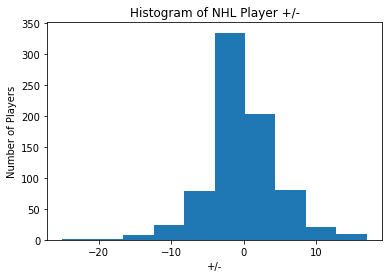

In [33]:
plusminusplot = data['+/-'].plot(kind='hist', title='Histogram of NHL Player +/-')
plusminusplot.set_xlabel('+/-')
plusminusplot.set_ylabel('Number of Players')
# histogram of all players +/- (number of goals for player was on ice for - number of goals against player was on ice for)

In [34]:
data.sort_values('PS', ascending=False).head()
# PS (Point Shares) == an estimate of the number of points contributed by each player

,Age,Team,Position,GP,G,A,Points,+/-,PIM,PS,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
Player,,,,,,,,,,,,,,,,,,,,,
John Carlson,30.0,WSH,D,25.0,8.0,28.0,36.0,15.0,6.0,6.0,...,70.0,11.4,633,25:20,41.0,17.0,0.0,1.0,0.0,1.440000
Connor McDavid,23.0,EDM,C,26.0,18.0,29.0,47.0,5.0,14.0,5.9,...,90.0,20.0,580,22:18,9.0,13.0,96.0,111.0,46.4,1.807692
Leon Draisaitl,24.0,EDM,C,26.0,16.0,32.0,48.0,6.0,6.0,5.8,...,83.0,19.3,595,22:53,6.0,5.0,167.0,174.0,49.0,1.846154
Brad Marchand,31.0,BOS,LW,23.0,16.0,23.0,39.0,17.0,43.0,5.5,...,59.0,27.1,453,19:42,2.0,14.0,11.0,16.0,40.7,1.695652
David Pastrnak,23.0,BOS,RW,23.0,20.0,16.0,36.0,9.0,18.0,5.4,...,94.0,21.3,441,19:10,7.0,13.0,1.0,4.0,20.0,1.565217


In [35]:
edmonton = data[data['Team'] == 'EDM']

In [36]:
edmonton.sort_values('Points', ascending=False)
# Draisaitl and McDavid are getting almost all of EDM's points, both have very high PS (Point Shares)

,Age,Team,Position,GP,G,A,Points,+/-,PIM,PS,...,SOG,Shooting%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,P/GP
Player,,,,,,,,,,,,,,,,,,,,,
Leon Draisaitl,24.0,EDM,C,26.0,16.0,32.0,48.0,6.0,6.0,5.8,...,83.0,19.3,595,22:53,6.0,5.0,167.0,174.0,49.0,1.846154
Connor McDavid,23.0,EDM,C,26.0,18.0,29.0,47.0,5.0,14.0,5.9,...,90.0,20.0,580,22:18,9.0,13.0,96.0,111.0,46.4,1.807692
Zack Kassian,29.0,EDM,RW,26.0,8.0,10.0,18.0,9.0,23.0,2.4,...,42.0,19.0,423,16:17,3.0,66.0,0.0,0.0,,0.692308
Oscar Klefbom,26.0,EDM,D,26.0,1.0,17.0,18.0,-5.0,6.0,2.3,...,59.0,1.7,672,25:50,70.0,16.0,0.0,0.0,,0.692308
James Neal,32.0,EDM,LW,26.0,14.0,3.0,17.0,-12.0,8.0,2.1,...,65.0,21.5,429,16:31,5.0,26.0,6.0,12.0,33.3,0.653846
Ryan Nugent-Hopkins,26.0,EDM,C,25.0,5.0,11.0,16.0,-4.0,12.0,1.3,...,60.0,8.3,482,19:16,18.0,11.0,123.0,122.0,50.2,0.640000
Darnell Nurse,24.0,EDM,D,26.0,2.0,9.0,11.0,-2.0,20.0,1.9,...,52.0,3.8,589,22:39,40.0,46.0,0.0,0.0,,0.423077
Ethan Bear,22.0,EDM,D,26.0,4.0,4.0,8.0,-3.0,16.0,1.6,...,36.0,11.1,549,21:06,31.0,17.0,0.0,0.0,,0.307692
Alex Chiasson,29.0,EDM,RW,22.0,2.0,4.0,6.0,-1.0,18.0,0.4,...,36.0,5.6,287,13:02,8.0,19.0,0.0,3.0,0.0,0.272727


In [37]:
edmonton.Points.value_counts(normalize=True).sort_index(ascending=False)

48.0    0.04
47.0    0.04
18.0    0.08
17.0    0.04
16.0    0.04
11.0    0.04
8.0     0.04
6.0     0.04
5.0     0.08
4.0     0.20
2.0     0.12
1.0     0.12
0.0     0.12
Name: Points, dtype: float64

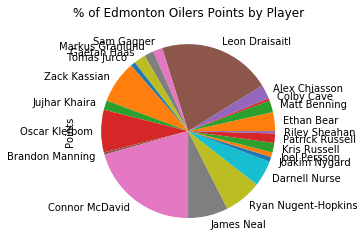

In [38]:
edmonton['Points'].plot(kind='pie', title='% of Edmonton Oilers Points by Player')

In [39]:
import seaborn

In [40]:
corr = data.corr()

In [41]:
corr # the higher the number, the greater the correlation between those 2 stats (max 1)
# Age has little correlation with any of the stats but Points has a high correlation with many stats, especially Goals and Assists (since points = G + A)
# Shots on Goal (SOG) also has a high correlation (0.847508) with Points proving those who shoot more get more points

,Age,GP,G,A,Points,+/-,PIM,PS,EV,PPG,...,GWG,EVA,PPA,SHA,SOG,BLK,HIT,FOW,FOL,P/GP
Age,1.000000,0.173812,0.012294,0.073090,0.052415,-0.008113,0.183828,0.054101,-0.018380,0.054054,...,-0.002580,0.091830,0.008556,0.101781,0.094754,0.224654,0.165038,0.123213,0.096247,0.026332
GP,0.173812,1.000000,0.542537,0.611384,0.636200,0.027808,0.463300,0.568743,0.533110,0.337322,...,0.332668,0.635873,0.380900,0.166299,0.766543,0.509229,0.474328,0.288336,0.295276,0.475890
G,0.012294,0.542537,1.000000,0.669340,0.879126,0.176716,0.260465,0.783028,0.935083,0.725556,...,0.660967,0.628641,0.540265,0.046931,0.793613,0.019221,0.157329,0.361231,0.376320,0.823623
A,0.073090,0.611384,0.669340,1.000000,0.942519,0.183756,0.288754,0.842114,0.607144,0.546390,...,0.449813,0.924475,0.819130,0.132997,0.764755,0.271619,0.125270,0.323921,0.324960,0.884542
Points,0.052415,0.636200,0.879126,0.942519,1.000000,0.197355,0.302376,0.892371,0.810032,0.676823,...,0.585821,0.875767,0.768443,0.106422,0.847508,0.182882,0.151118,0.370255,0.377708,0.937846
+/-,-0.008113,0.027808,0.176716,0.183756,0.197355,1.000000,0.033257,0.443471,0.237343,-0.017309,...,0.154529,0.237782,0.039226,0.081784,0.048464,0.108732,0.078331,-0.012799,-0.007713,0.225439
PIM,0.183828,0.463300,0.260465,0.288754,0.302376,0.033257,1.000000,0.292274,0.261021,0.158926,...,0.218252,0.303640,0.168625,0.117470,0.370231,0.308294,0.481994,0.099049,0.092461,0.222451
PS,0.054101,0.568743,0.783028,0.842114,0.892371,0.443471,0.292274,1.000000,0.737066,0.577446,...,0.535005,0.779590,0.689089,0.106385,0.748458,0.391714,0.176307,0.178906,0.180240,0.838520
EV,-0.018380,0.533110,0.935083,0.607144,0.810032,0.237343,0.261021,0.737066,1.000000,0.450467,...,0.623290,0.576711,0.478377,0.054609,0.737085,0.028230,0.171798,0.337719,0.359482,0.753983
PPG,0.054054,0.337322,0.725556,0.546390,0.676823,-0.017309,0.158926,0.577446,0.450467,1.000000,...,0.470946,0.490821,0.483326,-0.015719,0.598242,-0.001394,0.043053,0.240172,0.240287,0.640309


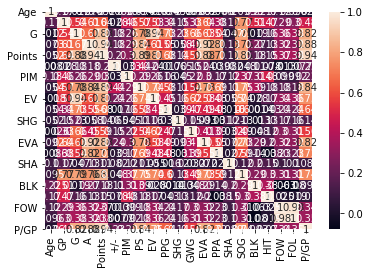

In [42]:
seaborn.heatmap(corr, annot=True)

In [43]:
# that heatmap is very hard to read so let's just choose a few stats
correlation = data[["+/-", "GP", "G", "SOG", "Points"]].corr()

In [44]:
correlation

,+/-,GP,G,SOG,Points
+/-,1.000000,0.027808,0.176716,0.048464,0.197355
GP,0.027808,1.000000,0.542537,0.766543,0.636200
G,0.176716,0.542537,1.000000,0.793613,0.879126
SOG,0.048464,0.766543,0.793613,1.000000,0.847508
Points,0.197355,0.636200,0.879126,0.847508,1.000000


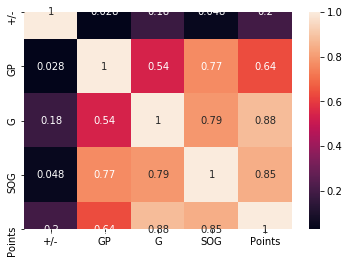

In [45]:
seaborn.heatmap(correlation, annot=True)

In [46]:
lr = LinearRegression()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# create the training and testing data by splitting the data into 80% training, other 20% testing
# attempting to predict Points based on the number of Shots a player takes, which has a pretty high correlation (0.847508)
x_train, x_test, y_train, y_test = train_test_split(data[['SOG']], data[['Points']], test_size=0.2, random_state=2)

In [49]:
lr.fit(x_train, y_train) # train the linear regression model y = mx + b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.coef_ # slope (m)

array([[0.28375626]])

In [51]:
lr.intercept_ # y intercept (b)

array([-0.91210275])

In [52]:
y_predict = lr.predict(x_test)

In [53]:
y_predict

array([[12.42444155],
       [ 7.6005851 ],
       [ 5.61429127],
       [ 6.46556005],
       [ 1.35794734],
       [11.00566024],
       [10.72190398],
       [ 8.16809762],
       [ 0.22292229],
       [ 2.77672865],
       [ 5.61429127],
       [ 1.07419108],
       [ 1.35794734],
       [ 6.18180379],
       [ 9.30312267],
       [-0.06083397],
       [ 1.92545986],
       [-0.91210275],
       [ 1.92545986],
       [-0.62834649],
       [ 4.76302248],
       [ 1.07419108],
       [ 7.6005851 ],
       [11.57317276],
       [15.26200417],
       [ 5.89804753],
       [16.96454174],
       [ 8.16809762],
       [-0.06083397],
       [ 4.47926622],
       [ 4.19550996],
       [ 6.18180379],
       [ 0.50667856],
       [ 1.6417036 ],
       [21.78839819],
       [ 9.58687893],
       [18.38332305],
       [ 8.73561015],
       [ 7.03307258],
       [12.70819781],
       [ 1.92545986],
       [ 7.88434136],
       [ 0.79043482],
       [ 8.45185388],
       [ 3.9117537 ],
       [ 7

Text(0, 32, 'Brad Marchand')

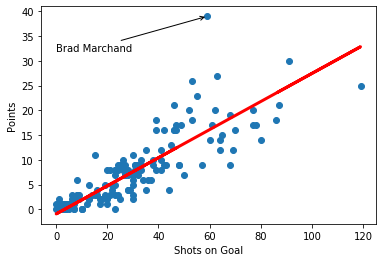

In [54]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, color='red', linewidth=3)
plt.xlabel('Shots on Goal')
plt.ylabel('Points')
plt.annotate('Brad Marchand', (59, 39), xytext=(0,32), arrowprops={'arrowstyle': '->'})

In [55]:
data.loc['Brad Marchand']
# Brad Marchand is the biggest outlier in the test data, since he has a very high Shooting % (27.1% of his shots are Goals!)

Age               31
Team             BOS
Position          LW
GP                23
G                 16
A                 23
Points            39
+/-               17
PIM               43
PS               5.5
EV                13
PPG                3
SHG                0
GWG                4
EVA               14
PPA                9
SHA                0
SOG               59
Shooting%       27.1
TOI              453
ATOI           19:42
BLK                2
HIT               14
FOW               11
FOL               16
FO%             40.7
P/GP         1.69565
Name: Brad Marchand, dtype: object

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
mae = mean_absolute_error(y_test, y_predict)

In [58]:
mae # on average the Linear Regression model is off by 2.61 points based on shots

2.6155485331793997